<a href="https://colab.research.google.com/github/dambar11803/CRUD_Generic_View/blob/master/HomeLoanPredict2081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Importing Libariries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [82]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Data2081.csv')
df.head()

,Gender,MartialStatus,Age,Education,ClientIncome,FamilyIncome,LoanType,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus
0,Male,Married,28,Plus two,564000,0,Home,2564000,1500000,19417.85,9.51,120,Approved
1,Female,Unmarried,55,Plus two,1125000,0,Home,4800000,3500000,46485.65,10.12,120,Rejected
2,Male,Married,36,Plus two,1112000,0,Home,3600000,2700000,29628.54,10.37,180,Rejected
3,Female,Unmarried,26,Bachelor,796850,0,Home,5023140,3000000,32550.87,10.17,180,Approved
4,Female,Married,27,Plus two,762350,0,Home,4547000,2800000,30380.81,10.17,180,Approved


In [85]:
df.tail()

,Gender,MartialStatus,Age,Education,ClientIncome,FamilyIncome,LoanType,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus
218,Male,Married,28,SLC,0,730240,Home,3000000,2100000,27891.39,10.12,120,Approved
219,Male,Married,34,Plus two,0,950126,Home,2245130,1500000,19922.42,10.12,120,Approved
220,Female,Married,35,Master,612350,0,Home,2550124,1500000,19922.42,10.12,120,Approved
221,Female,Unmarried,29,Plus two,500000,0,Home,1800000,1200000,15937.94,10.12,120,Approved
222,Male,Married,26,Plus two,742350,0,Home,3241820,2000000,26563.23,10.12,120,Approved


In [86]:
df.shape

(223, 13)

In [87]:
df.columns

Index(['Gender', 'MartialStatus', 'Age', 'Education', 'ClientIncome',
       'FamilyIncome', 'LoanType', 'HomeValue', 'LoanAmount', 'Emi',
       'InterestRate', 'Tenure', 'LoanStatus'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         223 non-null    object 
 1   MartialStatus  223 non-null    object 
 2   Age            223 non-null    int64  
 3   Education      223 non-null    object 
 4   ClientIncome   223 non-null    int64  
 5   FamilyIncome   223 non-null    int64  
 6   LoanType       223 non-null    object 
 7   HomeValue      223 non-null    int64  
 8   LoanAmount     223 non-null    int64  
 9   Emi            223 non-null    float64
 10  InterestRate   223 non-null    float64
 11  Tenure         223 non-null    int64  
 12  LoanStatus     223 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 22.8+ KB


In [89]:
df.describe()

,Age,ClientIncome,FamilyIncome,HomeValue,LoanAmount,Emi,InterestRate,Tenure
count,223.000000,2.230000e+02,2.230000e+02,2.230000e+02,2.230000e+02,223.000000,223.000000,223.000000
mean,36.869955,6.924847e+05,1.529105e+05,4.036274e+06,2.767578e+06,32987.820628,10.038655,151.210762
std,8.488792,2.861625e+05,5.044398e+05,1.510683e+06,1.064563e+06,12743.716946,0.319401,30.042994
min,22.000000,0.000000e+00,0.000000e+00,5.332100e+05,1.000000e+06,10850.290000,9.160000,120.000000
25%,30.000000,5.166600e+05,0.000000e+00,2.805622e+06,2.000000e+06,22905.710000,9.920000,120.000000
50%,35.000000,7.120000e+05,0.000000e+00,3.864000e+06,2.600000e+06,32550.870000,10.120000,180.000000
75%,42.000000,8.937265e+05,0.000000e+00,4.836570e+06,3.500000e+06,40707.965000,10.370000,180.000000
max,58.000000,1.350132e+06,6.542137e+06,9.000000e+06,6.000000e+06,72439.470000,10.370000,180.000000


In [90]:
#Check Duplicate  values
duplicate_rows = df.duplicated()
duplicate_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
218,False
219,False
220,False
221,False


In [107]:
df.LoanStatus
df.dtypes()

TypeError: 'Series' object is not callable

In [92]:
##CHECKING MISSING VALUES
df.isnull().sum()

,0
Gender,0
MartialStatus,0
Age,0
Education,0
ClientIncome,0
FamilyIncome,0
LoanType,0
HomeValue,0
LoanAmount,0
Emi,0


In [94]:
#COUNTING LOANSTATUS VALUES
temp = df['LoanStatus']
temp.value_counts()

,count
LoanStatus,
Approved,130
Rejected,93


In [95]:
##Counting Genders
gender = df['Gender']
gender.value_counts()

,count
Gender,
Male,146
Female,77


In [96]:
#Counting Martial Status
martial  = df['MartialStatus']
martial.value_counts()

,count
MartialStatus,
Married,160
Unmarried,63


In [97]:
df

,Gender,MartialStatus,Age,Education,ClientIncome,FamilyIncome,LoanType,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus
0,Male,Married,28,Plus two,564000,0,Home,2564000,1500000,19417.85,9.51,120,Approved
1,Female,Unmarried,55,Plus two,1125000,0,Home,4800000,3500000,46485.65,10.12,120,Rejected
2,Male,Married,36,Plus two,1112000,0,Home,3600000,2700000,29628.54,10.37,180,Rejected
3,Female,Unmarried,26,Bachelor,796850,0,Home,5023140,3000000,32550.87,10.17,180,Approved
4,Female,Married,27,Plus two,762350,0,Home,4547000,2800000,30380.81,10.17,180,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Male,Married,28,SLC,0,730240,Home,3000000,2100000,27891.39,10.12,120,Approved
219,Male,Married,34,Plus two,0,950126,Home,2245130,1500000,19922.42,10.12,120,Approved
220,Female,Married,35,Master,612350,0,Home,2550124,1500000,19922.42,10.12,120,Approved
221,Female,Unmarried,29,Plus two,500000,0,Home,1800000,1200000,15937.94,10.12,120,Approved


In [99]:
duration = df['Tenure']
duration.value_counts()

,count
Tenure,
180,116
120,107


In [100]:
#Counting Interest Rates
df['InterestRate'].value_counts()

,count
InterestRate,
10.37,57
10.12,52
10.17,36
9.92,34
9.76,14
9.51,12
9.16,9
9.41,9


In [101]:
## Removing LoanType variable
df= df.drop(['LoanType'], axis = 1)
df.head()

,Gender,MartialStatus,Age,Education,ClientIncome,FamilyIncome,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus
0,Male,Married,28,Plus two,564000,0,2564000,1500000,19417.85,9.51,120,Approved
1,Female,Unmarried,55,Plus two,1125000,0,4800000,3500000,46485.65,10.12,120,Rejected
2,Male,Married,36,Plus two,1112000,0,3600000,2700000,29628.54,10.37,180,Rejected
3,Female,Unmarried,26,Bachelor,796850,0,5023140,3000000,32550.87,10.17,180,Approved
4,Female,Married,27,Plus two,762350,0,4547000,2800000,30380.81,10.17,180,Approved


In [102]:
##Adding New Feature, TotalIncome
df['TotalIncome'] = df['ClientIncome'] + df['FamilyIncome']
df['TotalIncome'] = df['TotalIncome'] / 12
df.head()

,Gender,MartialStatus,Age,Education,ClientIncome,FamilyIncome,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome
0,Male,Married,28,Plus two,564000,0,2564000,1500000,19417.85,9.51,120,Approved,47000.000000
1,Female,Unmarried,55,Plus two,1125000,0,4800000,3500000,46485.65,10.12,120,Rejected,93750.000000
2,Male,Married,36,Plus two,1112000,0,3600000,2700000,29628.54,10.37,180,Rejected,92666.666667
3,Female,Unmarried,26,Bachelor,796850,0,5023140,3000000,32550.87,10.17,180,Approved,66404.166667
4,Female,Married,27,Plus two,762350,0,4547000,2800000,30380.81,10.17,180,Approved,63529.166667


In [103]:
## Adding More New Features
df['IncomeToEmi'] = df['TotalIncome'] / df['Emi']
df['HomeToLoanAmount'] = df['HomeValue'] / df['LoanAmount']
df.head()

,Gender,MartialStatus,Age,Education,ClientIncome,FamilyIncome,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,Male,Married,28,Plus two,564000,0,2564000,1500000,19417.85,9.51,120,Approved,47000.000000,2.420453,1.709333
1,Female,Unmarried,55,Plus two,1125000,0,4800000,3500000,46485.65,10.12,120,Rejected,93750.000000,2.016751,1.371429
2,Male,Married,36,Plus two,1112000,0,3600000,2700000,29628.54,10.37,180,Rejected,92666.666667,3.127615,1.333333
3,Female,Unmarried,26,Bachelor,796850,0,5023140,3000000,32550.87,10.17,180,Approved,66404.166667,2.040012,1.674380
4,Female,Married,27,Plus two,762350,0,4547000,2800000,30380.81,10.17,180,Approved,63529.166667,2.091095,1.623929


In [104]:
##Removing FamilyIncome and ClientIncome
df = df.drop(['ClientIncome', 'FamilyIncome'], axis = 1)
df.head()

,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,Male,Married,28,Plus two,2564000,1500000,19417.85,9.51,120,Approved,47000.000000,2.420453,1.709333
1,Female,Unmarried,55,Plus two,4800000,3500000,46485.65,10.12,120,Rejected,93750.000000,2.016751,1.371429
2,Male,Married,36,Plus two,3600000,2700000,29628.54,10.37,180,Rejected,92666.666667,3.127615,1.333333
3,Female,Unmarried,26,Bachelor,5023140,3000000,32550.87,10.17,180,Approved,66404.166667,2.040012,1.674380
4,Female,Married,27,Plus two,4547000,2800000,30380.81,10.17,180,Approved,63529.166667,2.091095,1.623929


In [108]:
df.tail()

,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
218,Male,Married,28,SLC,3000000,2100000,27891.39,10.12,120,Approved,60853.333333,2.181796,1.428571
219,Male,Married,34,Plus two,2245130,1500000,19922.42,10.12,120,Approved,79177.166667,3.974275,1.496753
220,Female,Married,35,Master,2550124,1500000,19922.42,10.12,120,Approved,51029.166667,2.561394,1.700083
221,Female,Unmarried,29,Plus two,1800000,1200000,15937.94,10.12,120,Approved,41666.666667,2.614307,1.500000
222,Male,Married,26,Plus two,3241820,2000000,26563.23,10.12,120,Approved,61862.500000,2.328877,1.620910


Gender Distribution:
Gender
Male      146
Female     77
Name: count, dtype: int64


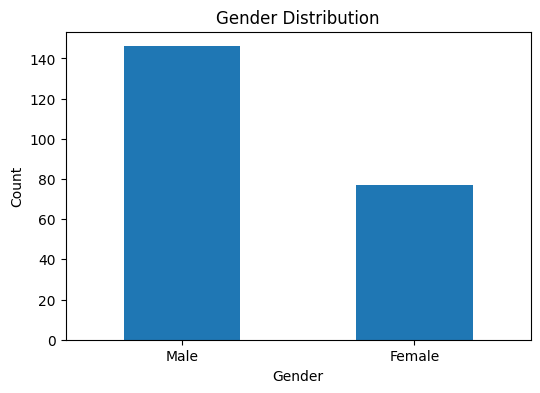

In [109]:
# Gender distribution counts
gender_counts = df["Gender"].value_counts()

# Print distribution
print("Gender Distribution:")
print(gender_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Martial Status Distribution:
MartialStatus
Married      160
Unmarried     63
Name: count, dtype: int64


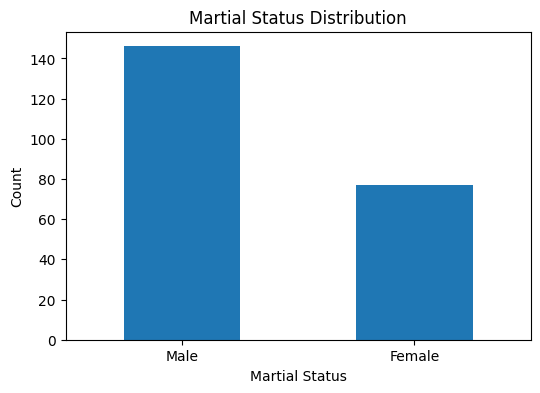

In [111]:
# Gender distribution counts
martial_counts = df["MartialStatus"].value_counts()

# Print distribution
print("Martial Status Distribution:")
print(martial_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title("Martial Status Distribution")
plt.xlabel("Martial Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

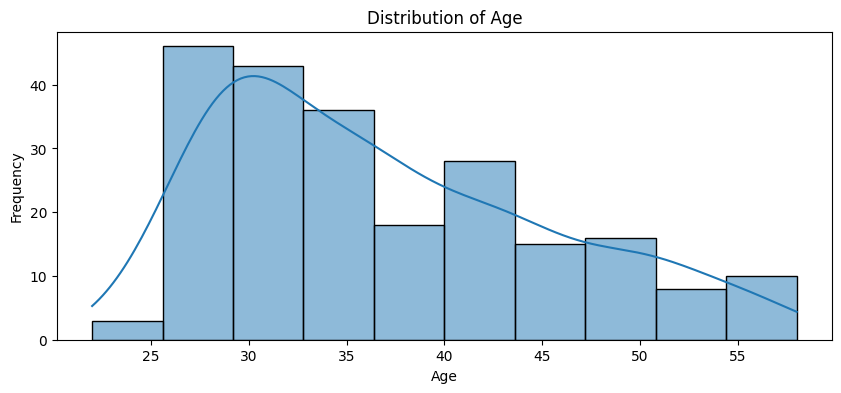

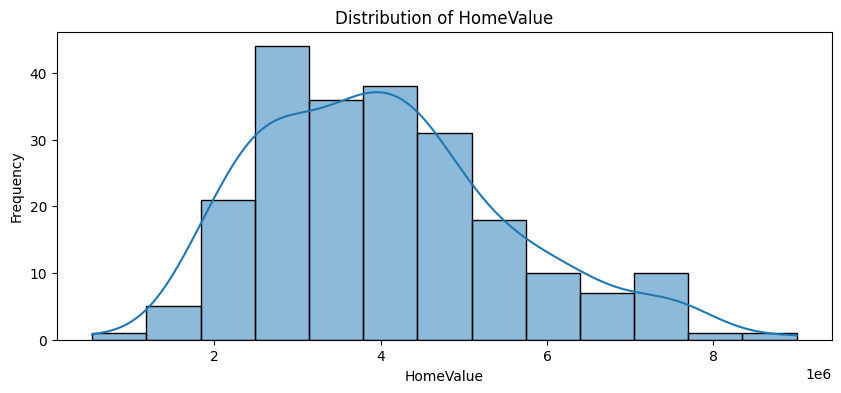

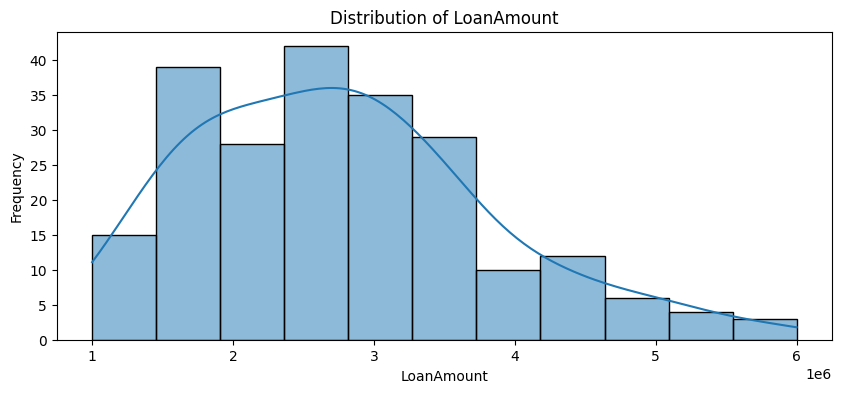

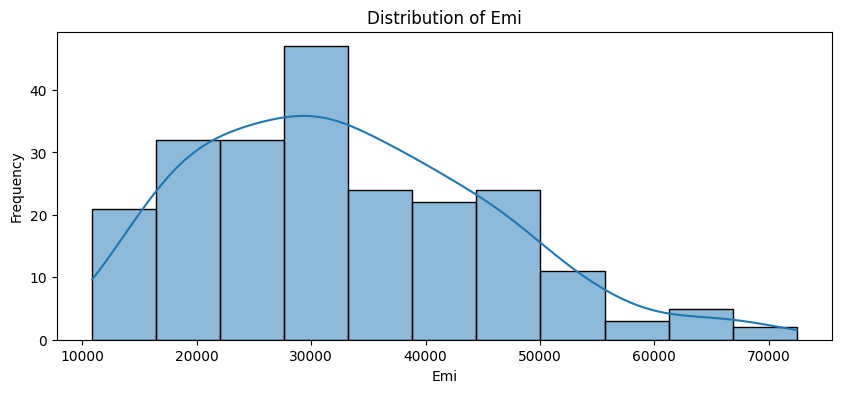

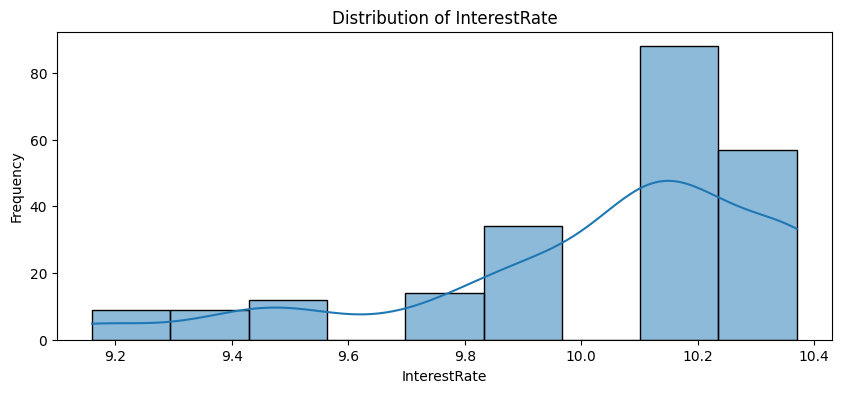

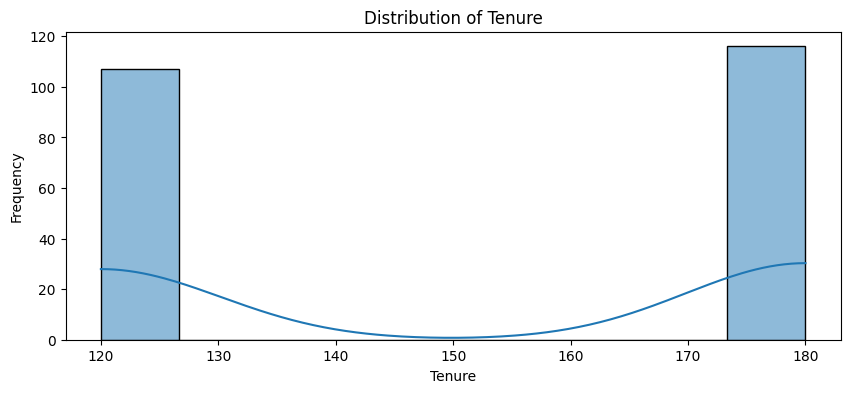

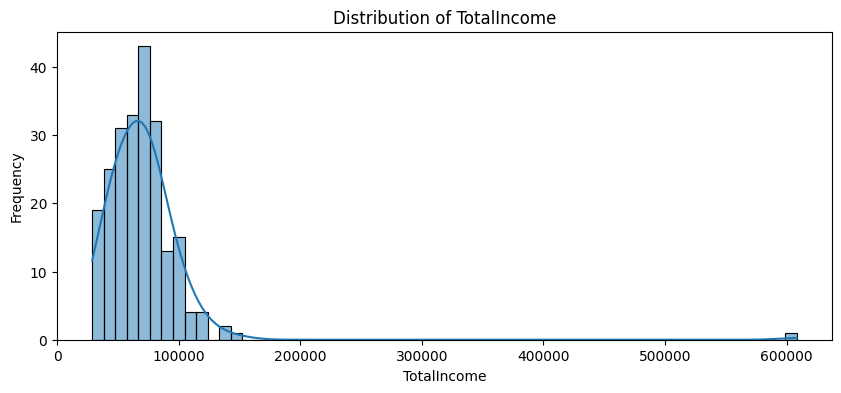

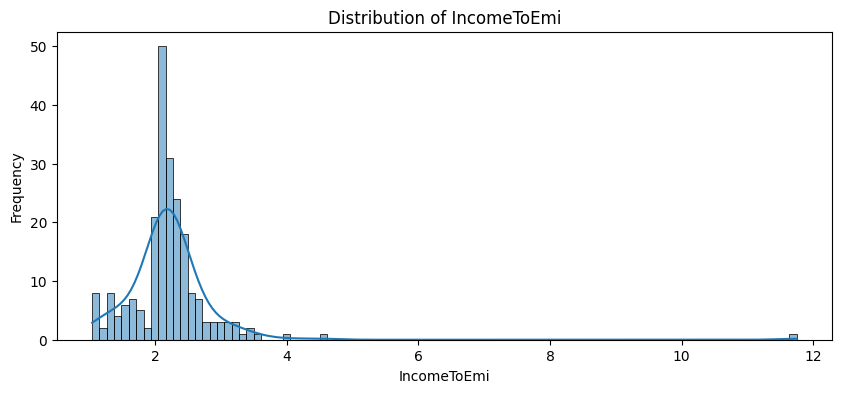

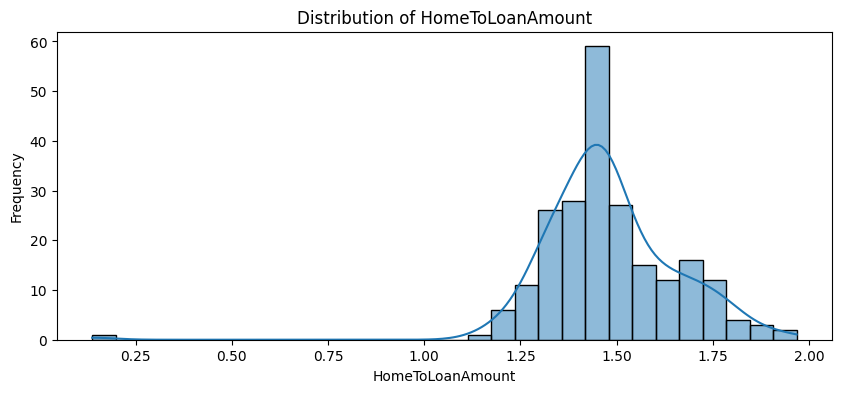

In [115]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
for feature in numerical_features.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [117]:
##Encoding Categoricla Values into Numerical Values
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0}).astype(int)
df['MartialStatus'] = df['MartialStatus'].map({'Married':1, 'Unmarried':0}).astype(int)
df['Education'] = df['Education'].map({'SLC':1, 'Plus two':2, 'Bachelor':3, 'Master':4}).astype(int)
df.head()

,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,1,1,28,2,2564000,1500000,19417.85,9.51,120,Approved,47000.000000,2.420453,1.709333
1,0,0,55,2,4800000,3500000,46485.65,10.12,120,Rejected,93750.000000,2.016751,1.371429
2,1,1,36,2,3600000,2700000,29628.54,10.37,180,Rejected,92666.666667,3.127615,1.333333
3,0,0,26,3,5023140,3000000,32550.87,10.17,180,Approved,66404.166667,2.040012,1.674380
4,0,1,27,2,4547000,2800000,30380.81,10.17,180,Approved,63529.166667,2.091095,1.623929


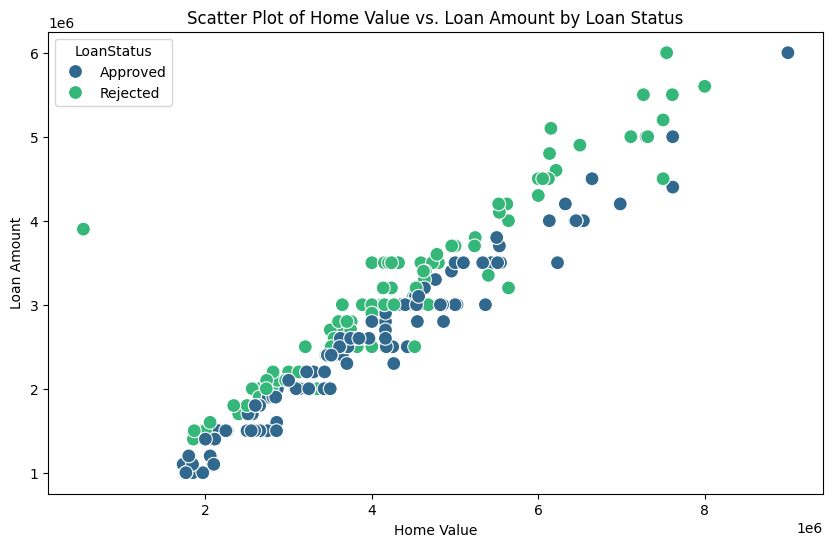

In [120]:
# Create a scatter plot of HomeValue Vs LoanAmount by LoanStauts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HomeValue', y='LoanAmount', hue='LoanStatus', palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Home Value')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Home Value vs. Loan Amount by Loan Status')

# Show the plot
plt.show()

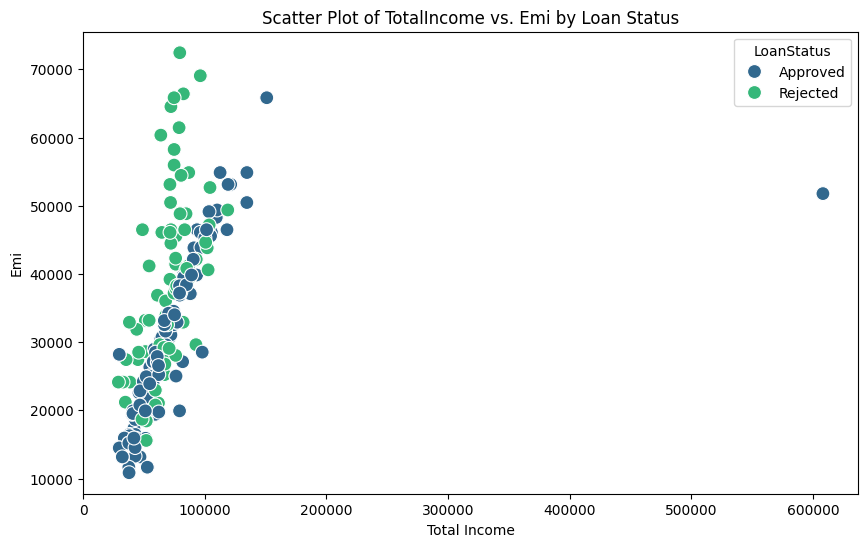

In [123]:
# Create a scatter plot of HomeValue Vs LoanAmount by LoanStauts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalIncome', y='Emi', hue='LoanStatus', palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Total Income')
plt.ylabel('Emi')
plt.title('Scatter Plot of TotalIncome vs. Emi by Loan Status')

# Show the plot
plt.show()

In [134]:
df.head()

,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,1,1,28,2,2564000,1500000,19417.85,9.51,120,1,47000.000000,2.420453,1.709333
1,0,0,55,2,4800000,3500000,46485.65,10.12,120,0,93750.000000,2.016751,1.371429
2,1,1,36,2,3600000,2700000,29628.54,10.37,180,0,92666.666667,3.127615,1.333333
3,0,0,26,3,5023140,3000000,32550.87,10.17,180,1,66404.166667,2.040012,1.674380
4,0,1,27,2,4547000,2800000,30380.81,10.17,180,1,63529.166667,2.091095,1.623929


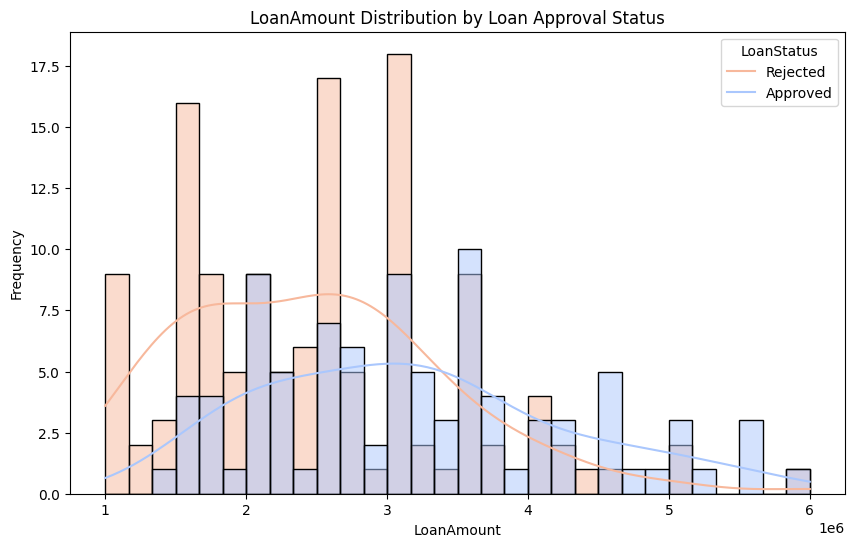

In [135]:
##RELATIONSHIP BETWEEN TARGET VARIABLE WITH IMPORTANT FEATURES
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LoanAmount', hue='LoanStatus', kde=True, bins=30, palette='coolwarm')
plt.title('LoanAmount Distribution by Loan Approval Status')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.legend(title='LoanStatus', labels=['Rejected', 'Approved'])
plt.show()

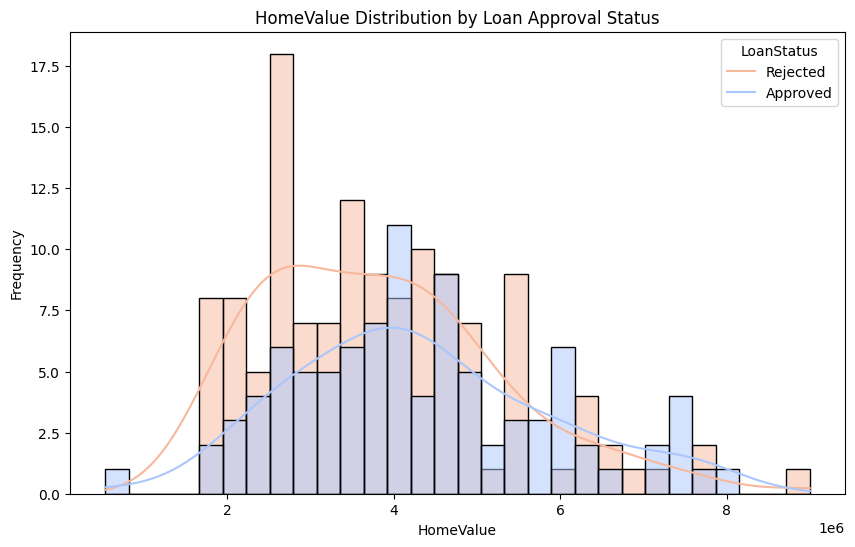

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HomeValue', hue='LoanStatus', kde=True, bins=30, palette='coolwarm')
plt.title('HomeValue Distribution by Loan Approval Status')
plt.xlabel('HomeValue')
plt.ylabel('Frequency')
plt.legend(title='LoanStatus', labels=['Rejected', 'Approved'])
plt.show()

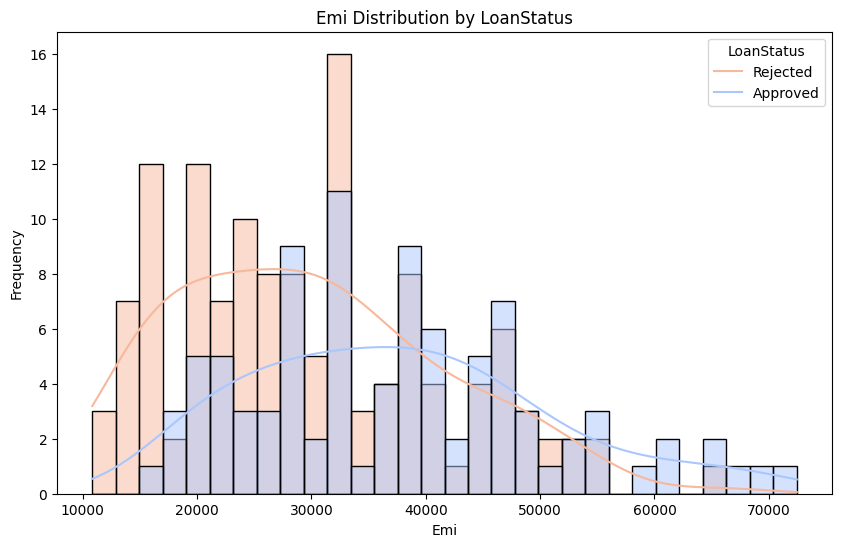

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Emi', hue='LoanStatus', kde=True, bins=30, palette='coolwarm')
plt.title('Emi Distribution by LoanStatus')
plt.xlabel('Emi')
plt.ylabel('Frequency')
plt.legend(title='LoanStatus', labels=['Rejected', 'Approved'])
plt.show()

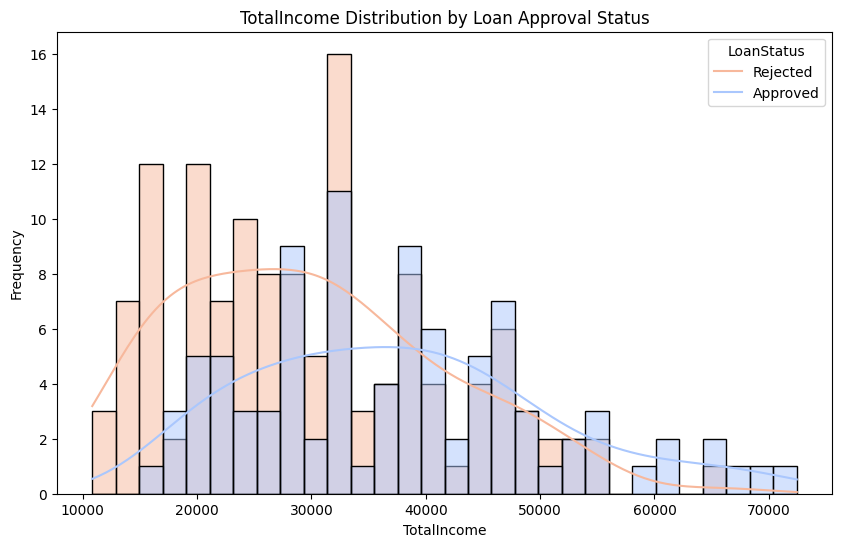

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Emi', hue='LoanStatus', kde=True, bins=30, palette='coolwarm')
plt.title('TotalIncome Distribution by Loan Approval Status')
plt.xlabel('TotalIncome')
plt.ylabel('Frequency')
plt.legend(title='LoanStatus', labels=['Rejected', 'Approved'])
plt.show()

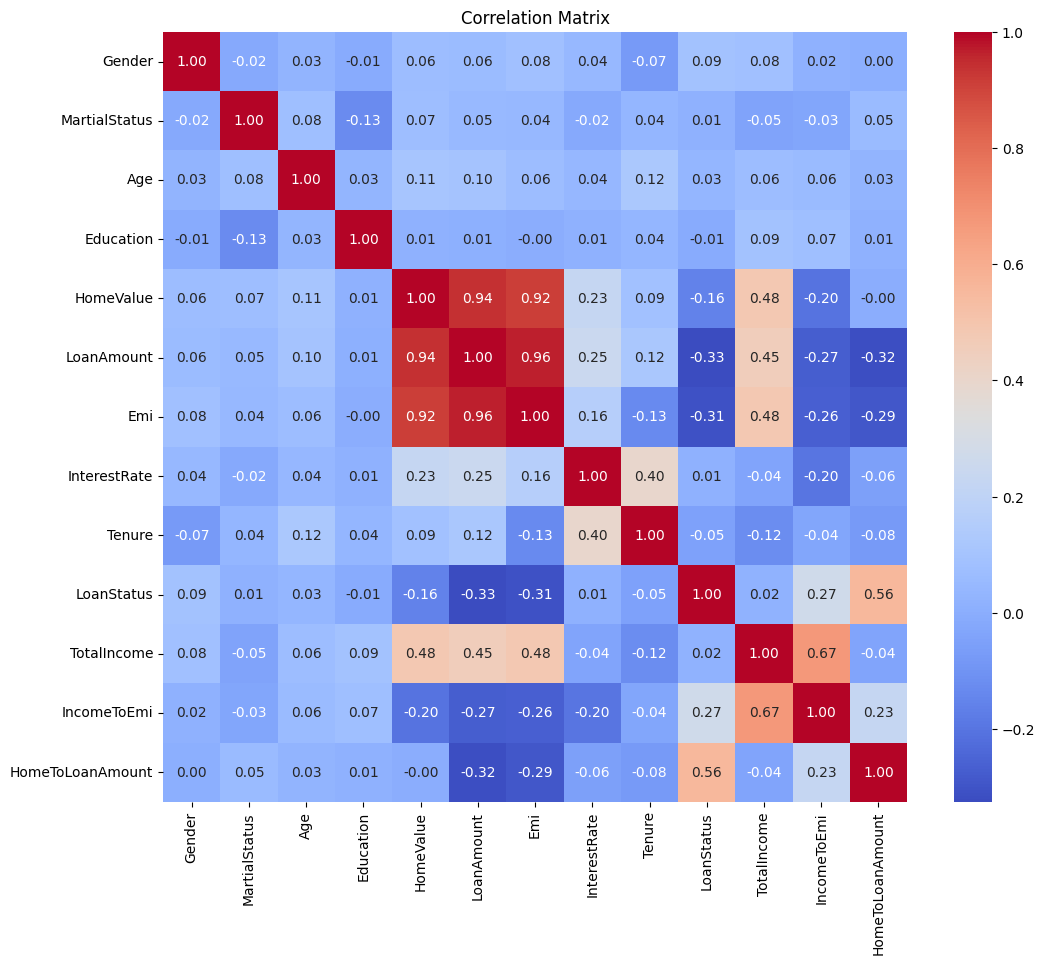

In [139]:
# Compute correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

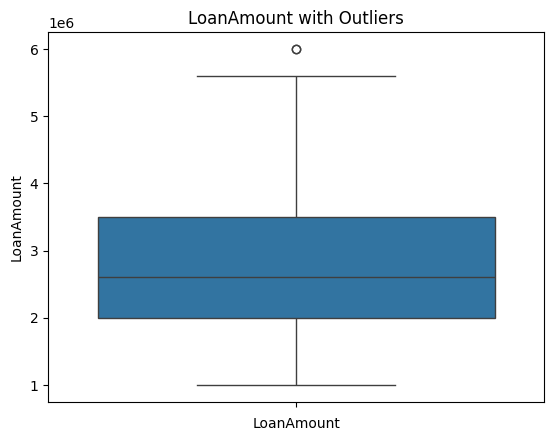

In [142]:
##Handling Outliers
import seaborn as sns
sns.boxplot(df['LoanAmount'])
plt.title('LoanAmount with Outliers')
plt.xlabel('LoanAmount')
plt.show()

In [141]:
df.head()

,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,1,1,28,2,2564000,1500000,19417.85,9.51,120,1,47000.000000,2.420453,1.709333
1,0,0,55,2,4800000,3500000,46485.65,10.12,120,0,93750.000000,2.016751,1.371429
2,1,1,36,2,3600000,2700000,29628.54,10.37,180,0,92666.666667,3.127615,1.333333
3,0,0,26,3,5023140,3000000,32550.87,10.17,180,1,66404.166667,2.040012,1.674380
4,0,1,27,2,4547000,2800000,30380.81,10.17,180,1,63529.166667,2.091095,1.623929


In [143]:
df.shape

(223, 13)

In [144]:
#Removing Outliers of LoanAmount
percentile25 = df['LoanAmount'].quantile(0.25)
percentile75 = df['LoanAmount'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['LoanAmount'] > upper_limit]
df[df['LoanAmount'] < lower_limit]
df1 = df[(df['LoanAmount'] >= lower_limit) & (df['LoanAmount'] <= upper_limit)]
df1.shape

(221, 13)

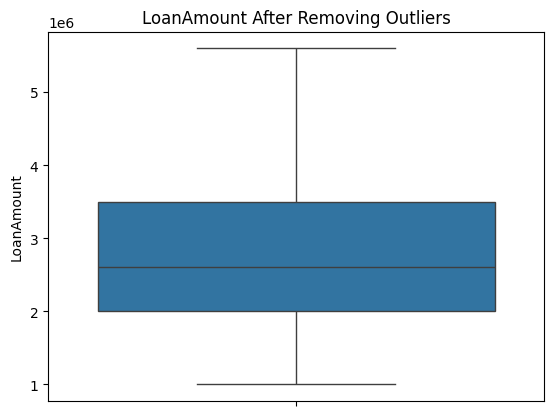

In [145]:
#LoanAmount After Removing Outliers
import seaborn as sns
sns.boxplot(df1['LoanAmount'])
plt.title('LoanAmount After Removing Outliers')
plt.show()

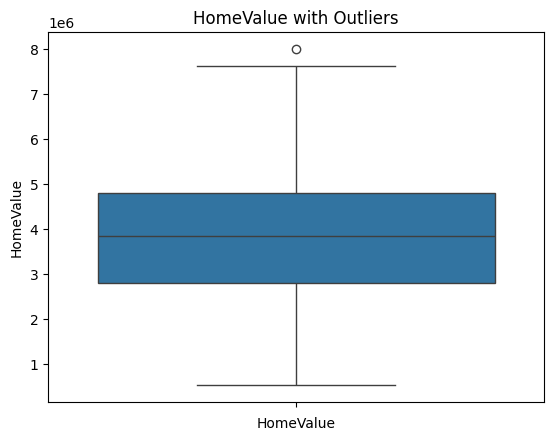

In [146]:
##HomeValue Outliers
import seaborn as sns
sns.boxplot(df1['HomeValue'])
plt.title('HomeValue with Outliers')
plt.xlabel('HomeValue')
plt.show()

In [147]:
#Removing Outliers of HomeValue
percentile25 = df1['HomeValue'].quantile(0.25)
percentile75 = df1['HomeValue'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df1[df1['HomeValue'] > upper_limit]
df1[df1['HomeValue'] < lower_limit]
df2 = df1[(df['HomeValue'] >= lower_limit) & (df1['HomeValue'] <= upper_limit)]
df2.shape

(220, 13)

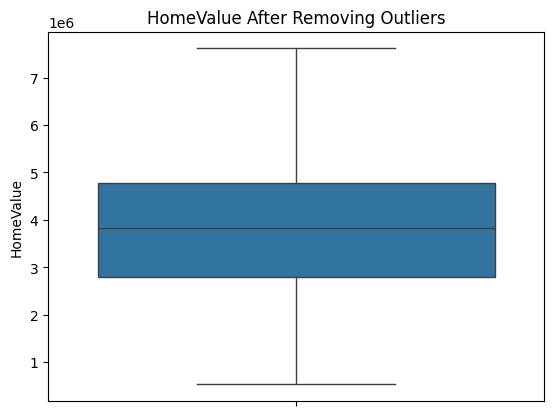

In [148]:
import seaborn as sns
sns.boxplot(df2['HomeValue'])
plt.title('HomeValue After Removing Outliers')
plt.show()

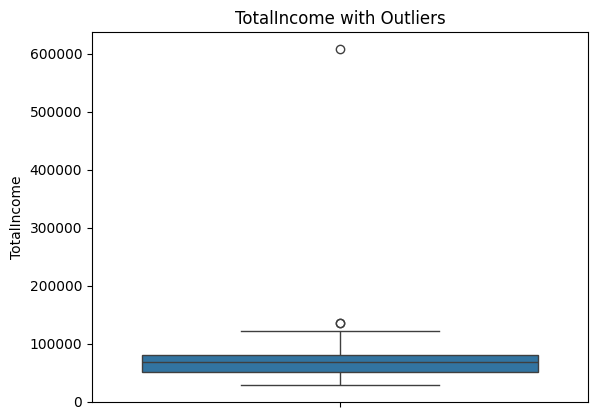

In [149]:
import seaborn as sns
sns.boxplot(df2['TotalIncome'])
plt.title('TotalIncome with Outliers')
plt.show()

In [150]:
##Handling oulier of TotalIncome

percentile25 = df2['TotalIncome'].quantile(0.25)
percentile75 = df2['TotalIncome'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df2[df2['TotalIncome'] > upper_limit]
df2[df2['TotalIncome'] < lower_limit]
nf = df2[(df2['TotalIncome'] >= lower_limit) & (df2['TotalIncome'] <= upper_limit)]
nf.shape

(217, 13)

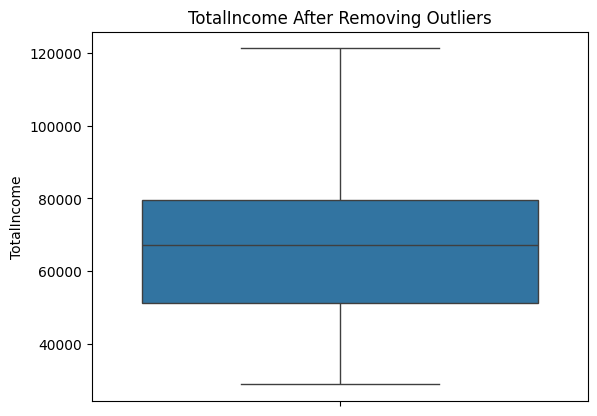

In [151]:
import seaborn as sns
sns.boxplot(nf['TotalIncome'])
plt.title('TotalIncome After Removing Outliers')
plt.show()

In [154]:
nf.shape

(217, 13)

In [155]:
nf.head()

,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,1,1,28,2,2564000,1500000,19417.85,9.51,120,1,47000.000000,2.420453,1.709333
1,0,0,55,2,4800000,3500000,46485.65,10.12,120,0,93750.000000,2.016751,1.371429
2,1,1,36,2,3600000,2700000,29628.54,10.37,180,0,92666.666667,3.127615,1.333333
3,0,0,26,3,5023140,3000000,32550.87,10.17,180,1,66404.166667,2.040012,1.674380
4,0,1,27,2,4547000,2800000,30380.81,10.17,180,1,63529.166667,2.091095,1.623929


In [156]:
##Encoding Tenure into Binary Values
# Convert 120 to '0' and 180 to '1'
nf['Tenure'] = nf['Tenure'].apply(lambda x: '0' if x == 120 else '1')
nf.head()


,Gender,MartialStatus,Age,Education,HomeValue,LoanAmount,Emi,InterestRate,Tenure,LoanStatus,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,1,1,28,2,2564000,1500000,19417.85,9.51,0,1,47000.000000,2.420453,1.709333
1,0,0,55,2,4800000,3500000,46485.65,10.12,0,0,93750.000000,2.016751,1.371429
2,1,1,36,2,3600000,2700000,29628.54,10.37,1,0,92666.666667,3.127615,1.333333
3,0,0,26,3,5023140,3000000,32550.87,10.17,1,1,66404.166667,2.040012,1.674380
4,0,1,27,2,4547000,2800000,30380.81,10.17,1,1,63529.166667,2.091095,1.623929


In [157]:
## DEPENDENT AND INDEPENDENT VARIABLE
##INDEPENDENT VARIABLE
X = nf.drop(['Gender', 'MartialStatus', 'Age', 'InterestRate', 'Education', 'LoanStatus'], axis = 1)
X.head()

,HomeValue,LoanAmount,Emi,Tenure,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,2564000,1500000,19417.85,0,47000.000000,2.420453,1.709333
1,4800000,3500000,46485.65,0,93750.000000,2.016751,1.371429
2,3600000,2700000,29628.54,1,92666.666667,3.127615,1.333333
3,5023140,3000000,32550.87,1,66404.166667,2.040012,1.674380
4,4547000,2800000,30380.81,1,63529.166667,2.091095,1.623929


In [158]:
X.shape

(217, 7)

In [159]:
##DEPENDENT VARIABLE (TARGET VARIABLE)
y = nf['LoanStatus']
y


,LoanStatus
0,1
1,0
2,0
3,1
4,1
...,...
218,1
219,1
220,1
221,1


In [160]:
log_features = ['HomeValue', 'LoanAmount', 'Emi','TotalIncome','IncomeToEmi', 'HomeToLoanAmount']
log_features

['HomeValue',
 'LoanAmount',
 'Emi',
 'TotalIncome',
 'IncomeToEmi',
 'HomeToLoanAmount']

In [161]:
## Copying X to X_transform
X_transform = X.copy()
X_transform.shape
X_transform.columns

Index(['HomeValue', 'LoanAmount', 'Emi', 'Tenure', 'TotalIncome',
       'IncomeToEmi', 'HomeToLoanAmount'],
      dtype='object')

In [162]:
X_transform.shape

(217, 7)

In [163]:
## LOG TRANSFORMATION TO log_features
X_transform[log_features] = np.log1p(X[log_features])
X_transform

,HomeValue,LoanAmount,Emi,Tenure,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,14.757079,14.220976,9.874000,0,10.757924,1.229773,0.996703
1,15.384127,15.068274,10.746920,0,11.448398,1.104181,0.863493
2,15.096445,14.808763,10.296527,1,11.436775,1.417700,0.847298
3,15.429566,14.914123,10.390590,1,11.103530,1.111861,0.983718
4,15.329978,14.845130,10.321599,1,11.059270,1.128525,0.964673
...,...,...,...,...,...,...,...
218,14.914123,14.557448,10.236109,0,11.016238,1.157446,0.887303
219,14.624274,14.220976,9.899651,0,11.279456,1.604280,0.914991
220,14.751653,14.220976,9.899651,0,10.840172,1.270152,0.993282
221,14.403298,13.997833,9.676520,0,10.637481,1.284900,0.916291


In [164]:
X_transform.shape

(217, 7)

In [165]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

In [167]:
X_test.shape

(44, 7)

In [168]:
y_train.shape

(173,)

In [169]:
y_test.shape

(44,)

In [171]:
y_test.value_counts()

,count
LoanStatus,
1,26
0,18


In [172]:
y_train.value_counts()

,count
LoanStatus,
1,100
0,73


In [173]:
# Apply SMOTE oversampling only on the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [175]:

X_train_resampled.head()

,HomeValue,LoanAmount,Emi,Tenure,TotalIncome,IncomeToEmi,HomeToLoanAmount
0,14.731802,14.220976,9.674110,1.0,10.842863,1.439389,0.980829
1,15.278998,15.068274,10.746920,0.0,11.185592,0.936351,0.804049
2,15.201805,14.862830,10.541481,0.0,11.241917,1.103486,0.876930
3,14.914123,14.557448,10.236109,0.0,11.016238,1.157446,0.887303
4,15.709493,15.319588,10.807339,1.0,11.609002,1.172256,0.906984


In [176]:
X_train_resampled.shape

(200, 7)

In [177]:
y_train_resampled.value_counts()

,count
LoanStatus,
1,100
0,100


In [178]:
## MODEL SELECTION FOR TRAINING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [180]:
##Confusion Matrix Logistic Regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model_reg = LogisticRegression()
model_reg.fit(X_train_resampled, y_train_resampled)

#Output of Model Prediction
y_pred1 = model_reg.predict(X_test)

# Calculate the confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix1)


Confusion Matrix:
[[12  6]
 [ 2 24]]


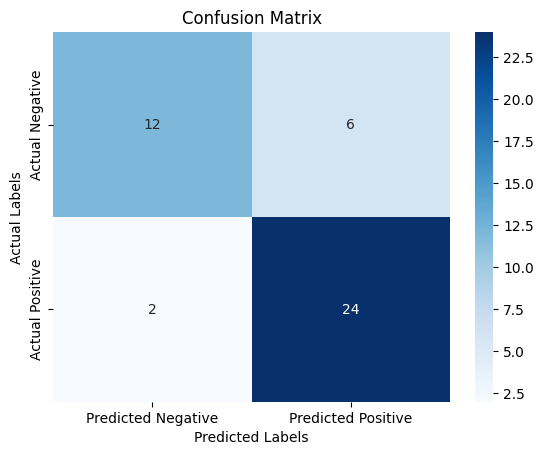

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [182]:
##Classifiction Report of Logistic Regression
report_logistic = classification_report(y_test, y_pred1)

# Print the classification report
print("Classification Report of Logistic Regression:")
print(report_logistic)

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.80      0.92      0.86        26

    accuracy                           0.82        44
   macro avg       0.83      0.79      0.80        44
weighted avg       0.82      0.82      0.81        44



In [183]:
##CROSS-VALIDATION OF LOGISTIC REGRESSION
cv_scores1 = cross_val_score(model_reg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the results
print(f"Cross-validation scores: {cv_scores1}")
print(f"Mean accuracy: {cv_scores1.mean():.4f}")
print(f"Standard deviation: {cv_scores1.std():.4f}")

Cross-validation scores: [0.75  0.775 0.8   0.75  0.775]
Mean accuracy: 0.7700
Standard deviation: 0.0187


In [184]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_resampled, y_train_resampled)
y_pred2 = model_tree.predict(X_test)
accuracy = accuracy_score(y_pred2, y_test)
# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix2)



Confusion Matrix:
[[16  2]
 [ 0 26]]


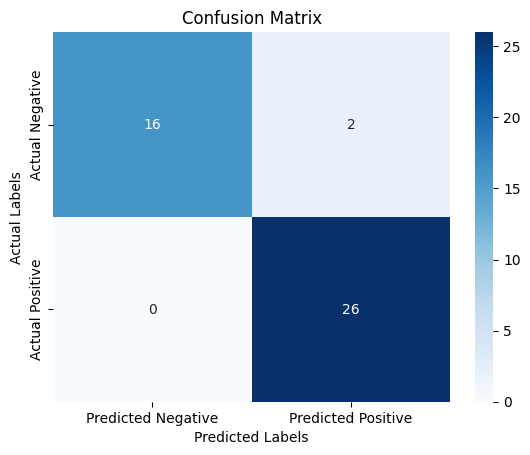

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [194]:
##Classifiction Report of Decision Tree Classifier
report_decisiontree = classification_report(y_test, y_pred2)

# Print the classification report
print("Classification Report of Decision Tree Classifier:")
print(report_decisiontree)

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.93      1.00      0.96        26

    accuracy                           0.95        44
   macro avg       0.96      0.94      0.95        44
weighted avg       0.96      0.95      0.95        44



In [187]:
#Cross-Validation of Decision Tree Classifier
cv_scores2 = cross_val_score(model_tree, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the results
print(f"Cross-validation scores: {cv_scores2}")
print(f"Mean accuracy: {cv_scores2.mean():.4f}")
print(f"Standard deviation: {cv_scores2.std():.4f}")

Cross-validation scores: [1.    0.975 0.975 0.975 0.975]
Mean accuracy: 0.9800
Standard deviation: 0.0100


In [188]:
##RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier()
model_random.fit(X_train_resampled, y_train_resampled)
y_pred3 = model_random.predict(X_test)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

# Display the confusion matrix
print("Confusion Matrix of Decision Tree:")
print(conf_matrix3)

Confusion Matrix of Decision Tree:
[[17  1]
 [ 0 26]]


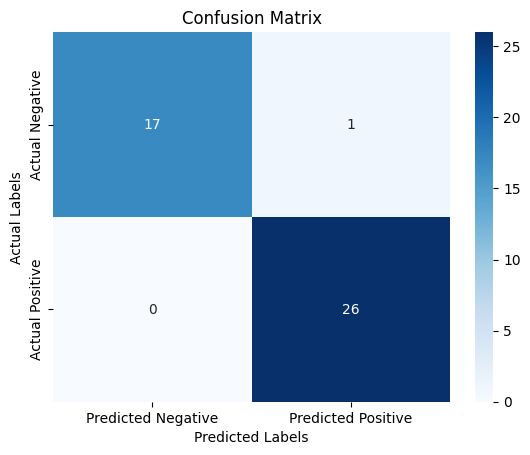

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [195]:
##Classifiction Report of Decision Tree
report_random = classification_report(y_test, y_pred3)

# Print the classification report
print("Classification Report of Random Forest Classifier:")
print(report_random)

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.96      1.00      0.98        26

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



In [191]:
#Cross-Validation of Decision Tree Classifier
cv_scores3 = cross_val_score(model_random, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the results
print(f"Cross-validation scores: {cv_scores3}")
print(f"Mean accuracy: {cv_scores3.mean():.4f}")
print(f"Standard deviation: {cv_scores3.std():.4f}")

Cross-validation scores: [1.    1.    0.95  0.975 0.975]
Mean accuracy: 0.9800
Standard deviation: 0.0187


In [192]:
#K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)
y_pred4 = model_knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix4 = confusion_matrix(y_test, y_pred4)
# Display the confusion matrix
print("Confusion Matrix of K-NN")
print(conf_matrix4)


Confusion Matrix of K-NN
[[13  5]
 [ 3 23]]


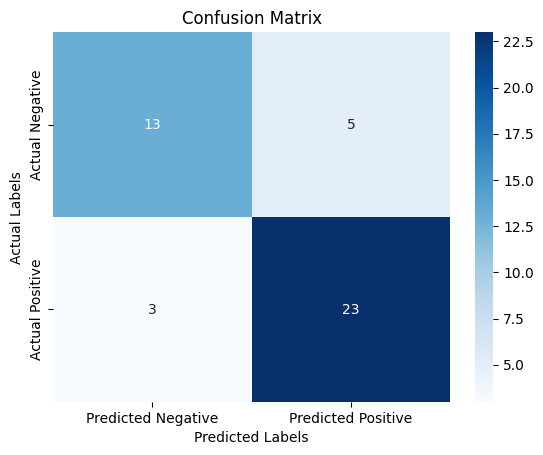

In [193]:
# Plot the confusion matrix
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [197]:
##Classifiction Report of K-NN
report_knn = classification_report(y_test, y_pred4)

# Print the classification report
print("Classification Report of K-Nearest Neighbor:")
print(report_knn)

Classification Report of K-Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.82      0.88      0.85        26

    accuracy                           0.82        44
   macro avg       0.82      0.80      0.81        44
weighted avg       0.82      0.82      0.82        44



In [198]:
## Calculatng AUC-ROC metrics
##Summary:AUC-ROC Score: A value between 0.5 and 1.0, where 1.0 indicates perfect classification and 0.5 suggests no discriminatory power (random guessing).
##Interpretation: Higher AUC-ROC values indicate a better-performing model in terms of distinguishing between the classes.


In [200]:
##Calculate AUC-ROC metric of Logistic Regression

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# Predict probabilities on the test set
y_prob = model_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc1 = auc(fpr, tpr)
print("The ROC_AUC Score of Logistic Regression: ", roc_auc1)

The ROC_AUC Score of Logistic Regression:  0.8547008547008548


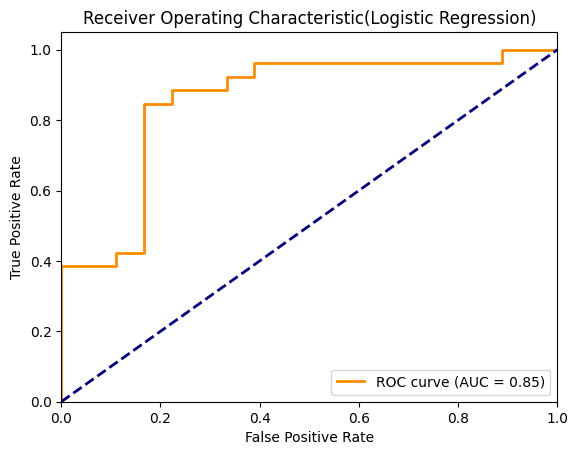

In [201]:
# Plot the ROC curve of Logistic Regression
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

In [203]:
##Calculate AUC-ROC metric of Decision Tree Classifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# Predict probabilities on the test set
y_prob = model_tree.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc2 = auc(fpr, tpr)
print("The ROC_AUC value of Decision Tree Classifier: ", roc_auc2)

The ROC_AUC value of Decision Tree Classifier:  0.9444444444444444


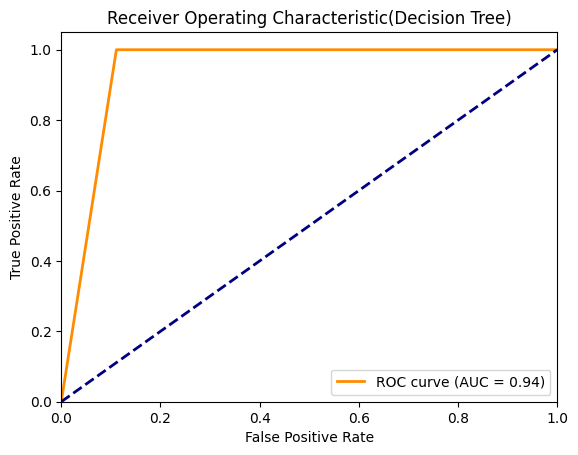

AUC-ROC: 0.94


In [204]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC score
print(f"AUC-ROC: {roc_auc2:.2f}")

In [205]:
##Calculate AUC-ROC metric of Random Forest Classifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# Predict probabilities on the test set
y_prob = model_random.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc3 = auc(fpr, tpr)
print("The ROC_AUC value of Decision Tree Classifier: ", roc_auc3)

The ROC_AUC value of Decision Tree Classifier:  0.9797008547008547


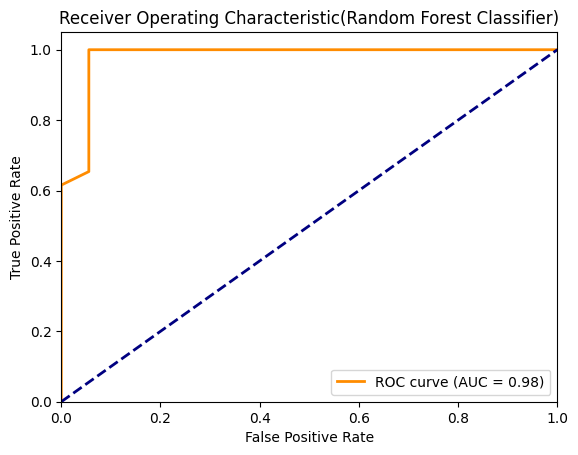

In [206]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

In [207]:
##Calculate AUC-ROC metric of KNN Classifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# Predict probabilities on the test set
y_prob = model_knn.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc4 = auc(fpr, tpr)
print("ROC-AUC of knn: ", roc_auc4)

ROC-AUC of knn:  0.907051282051282


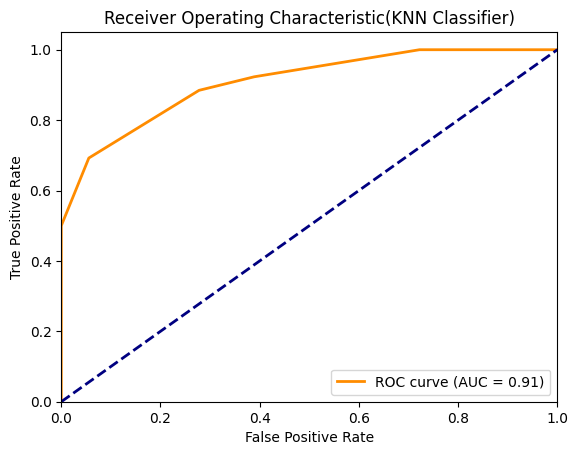

In [208]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(KNN Classifier)')
plt.legend(loc="lower right")
plt.show()


In [210]:
##SAVING THE RANDOM FOREST CLASSIFER
import joblib
joblib.dump(model_random, '/content/drive/MyDrive/RandomForestModel.joblib')
print("Random Forest Model has been Saved")

Random Forest Model has been Saved
